In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Buka data menjadi data dataframe

df = pd.read_csv('data_tugas16.csv')
df

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
239,196,Espeon,Psychic,525,65,65,60,130,95,110
240,197,Umbreon,Dark,525,95,65,110,60,130,65
241,198,Murkrow,Dark Flying,405,60,85,42,85,42,91
242,199,Slowking,Water Psychic,490,95,75,80,100,110,30


In [ ]:
# Buat salinan dataframe dengan dua kolom yaitu attack dan defense

df2 = df[['Attack', 'Defense']]
df2

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43
...,...,...
239,65,60
240,65,110
241,85,42
242,75,80


In [ ]:
# Lakukan transformasi pada data

scaler = StandardScaler()

transformed_df2 = scaler.fit_transform(df2)
transformed_df2 = pd.DataFrame(transformed_df2, columns=df2.columns)
transformed_df2

,Attack,Defense
0,-0.849268,-0.720998
1,-0.401184,-0.218257
2,0.288175,0.499945
3,0.908598,1.936349
4,-0.745864,-0.936459
...,...,...
239,-0.297781,-0.325987
240,-0.297781,1.469518
241,0.391579,-0.972369
242,0.046899,0.392215


In [ ]:
# Tentukan NIlai K terbaik

def elbowMethod(X, k_min=1, k_max=10, save=False):
    K_range = range(k_min,k_max+1)

    result = []
    for k in K_range:
        model = KMeans(n_clusters = k, random_state=20)
        model.fit(X)
        result.append(model.inertia_)
        
    fig, ax = plt.subplots(figsize=(10,6))    
    ax.plot(K_range, result)

    plt.title('Elbow Method')
    plt.xlabel('n_cluster')
    plt.ylabel('WCSS')
    
    if save==True:
        plt.savefig('elbowMethod.png', dpi=200)
    
    plt.show()

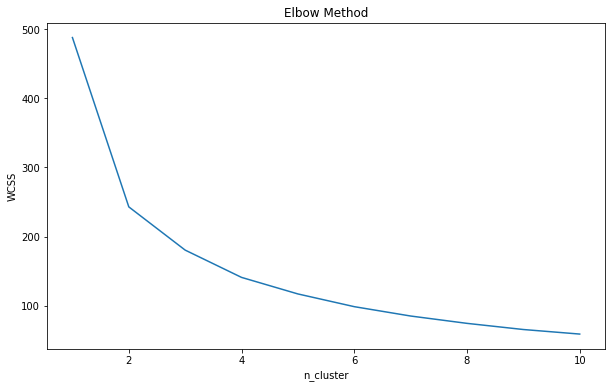

In [ ]:
elbowMethod(transformed_df2)

In [ ]:
# Tentukan NIlai K terbaik

def silMethod(X, k_min=2, k_max=10, save=False):
    K_range2 = range(k_min,k_max+1)

    result_sm = []
    for k in K_range2:
        model2 = KMeans(n_clusters = k, random_state=20)
        model2.fit(X)
        labels = model2.labels_
    
        s_score = silhouette_score(X, labels, metric='euclidean')
        result_sm.append(s_score)
        
    fig2, ax2 = plt.subplots(figsize=(12,6))
    ax2.plot(K_range2, result_sm, marker='o')
    
    for i, value in enumerate(result_sm):
        ax2.text(i+2.02, value-0.0002, round(value,2), fontsize=12, fontweight='bold')
    
    plt.xticks(K_range2)
    plt.grid()
    plt.title('Silhouette Method')
    plt.xlabel('n-Cluster')
    plt.ylabel('Silhouette Score')
    if save==True:
        plt.savefig('silMethod.png', dpi=200)
    plt.show()

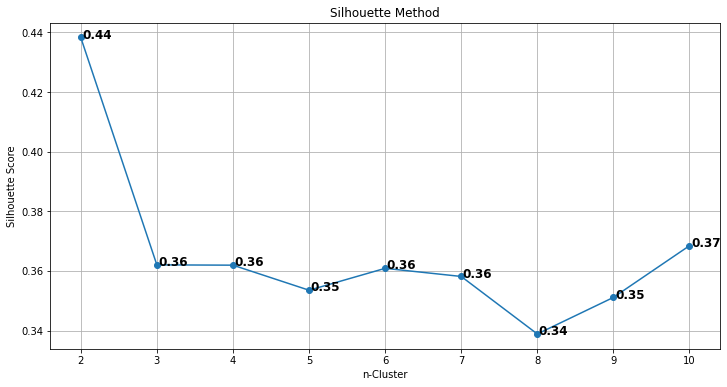

In [ ]:
silMethod(transformed_df2)

In [ ]:
# Lakukan klustering dengan mengacu pada nilai K terbaik

kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(transformed_df2)
clustered_df2 = transformed_df2.copy()
clustered_df2['label_kmeans_2'] = kmeans_2.labels_

clustered_df2

,Attack,Defense,label_kmeans_2
0,-0.849268,-0.720998,1
1,-0.401184,-0.218257,1
2,0.288175,0.499945,0
3,0.908598,1.936349,0
4,-0.745864,-0.936459,1
...,...,...,...
239,-0.297781,-0.325987,1
240,-0.297781,1.469518,0
241,0.391579,-0.972369,1
242,0.046899,0.392215,0


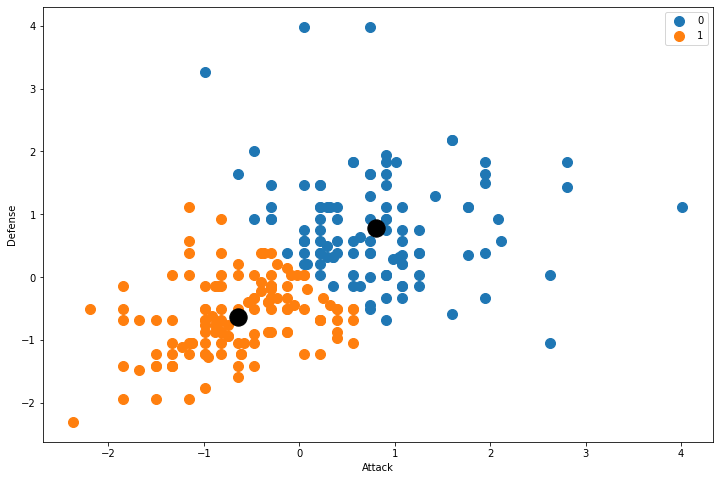

In [ ]:
# Lakukan plot

plt.figure(figsize=(12,8))

plt.scatter(clustered_df2.Attack[clustered_df2.label_kmeans_2 == 0], clustered_df2.Defense[clustered_df2.label_kmeans_2 == 0], s=100, label=0)
plt.scatter(clustered_df2.Attack[clustered_df2.label_kmeans_2 == 1], clustered_df2.Defense[clustered_df2.label_kmeans_2 == 1], s=100, label=1)

centers = kmeans_2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=300)
plt.legend()
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

**Analisis Hasil Clustering**

1. Terdapat 2 kelompok pada data tersebut, pertama yaitu data yang memiliki attack rendah dengan defense yang rendah, serta data yang memiliki attack tinggi dengan defense yang tinggi
2. Untuk kelompok ke-2 dengan nilai attack dan defense yang tinggi, cenderung memiliki nilai yang tinggi di salah satu sisinya saja. Attacknya saja yang tinggi, atau Defense nya saja yang tinggi.
3. Kenaikan nilai Attack dan Defense cenderung berbanding lurus / linear.